<a href="https://colab.research.google.com/github/PaulToronto/Johns-Hopkins-Coursera-Applied-Calculus-With-Python/blob/main/3_1_Limits_and_Rates_of_Change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1 Limits and Rates of Change

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

## 3.1.1 Reading: Lists and Tuples in Python

### Lists

- a list is an **ordered** collection of objects
- lists are mutable
- can contain an unlimited number of objects of any type
- a list's **lenght** is the number of objects in the list
- the objects are indexed
    - zero-based indexing

In [2]:
my_list = [12, 'seven', -2.5]
len(my_list)

3

In [3]:
my_list[0]

12

In [4]:
number_list = [0, -1, 5, -2.7, 5.9, 0, 4.1]
max(number_list), min(number_list)

(5.9, -2.7)

### Tuples

- like a list, but **immutable**

In [5]:
my_tuple = (1, 2, 3)
type(my_tuple)

tuple

### Adding items to a list

In [6]:
my_list = [1, 2, 3]
my_list.append(4)
my_list

[1, 2, 3, 4]

In [7]:
my_list.append([0, 0, 0])
my_list

[1, 2, 3, 4, [0, 0, 0]]

In [8]:
my_list.extend([1, 1, 1])
my_list

[1, 2, 3, 4, [0, 0, 0], 1, 1, 1]

In [9]:
my_list.insert(2, 'index two')
my_list

[1, 2, 'index two', 3, 4, [0, 0, 0], 1, 1, 1]

### Removing items from a list

In [10]:
del my_list[2]
my_list

[1, 2, 3, 4, [0, 0, 0], 1, 1, 1]

In [11]:
my_list.remove(1)

In [12]:
my_list.remove(1)

In [13]:
my_list # when there are more than it removes only the first

[2, 3, 4, [0, 0, 0], 1, 1]

### List Comprehensions

`[expression for item in l if condition`

In [14]:
number_list = [0, -1, 5, -2.7, 5.9, 0, 4.1]
positive_number_list = [i for i in number_list if i > 0]
positive_number_list

[5, 5.9, 4.1]

### List Comprehension with SymPy

Suppose we want to find $f(x) = x^{2} + 2x + 1$ for all $x$ in our number list. 

In [15]:
number_list = [0, -1, 5, -2.7, 5.9, 0, 4.1]

In [16]:
x = sym.symbols('x')
f = x**2 + 2*x + 1
f

x**2 + 2*x + 1

In [17]:
[f.subs(x, i) for i in number_list]

[1, 0, 36, 2.89000000000000, 47.6100000000000, 1, 26.0100000000000]

## 3.1.2 Theory: Introduction to Limits

### Definition: Limit

We write $\lim_{x \to a} f(x) = L$ if we can make $f(x)$ as close to $L$ as we like by taking $x$ as close to $a$ (on either side) but not equal to $a$. 

### Example

$$
f(x) = x^{2}
$$

$$
\lim_{x \to 2} f(x) = 4
$$

In [18]:
f = x**2
f

x**2

In [19]:
f.subs(x, 2), f.limit(x, 2)

(4, 4)

### Example

In [20]:
x = sym.symbols('x')

f = sym.Piecewise((x**2 + 1, x > 0),
                  (x + 1, x < 0), 
                  (3, True))

In [21]:
print(sym.latex(f))

\begin{cases} x^{2} + 1 & \text{for}\: x > 0 \\x + 1 & \text{for}\: x < 0 \\3 & \text{otherwise} \end{cases}


$$
f(x) = \begin{cases} x^{2} + 1 & \text{for}\: x > 0 \\x + 1 & \text{for}\: x < 0 \\3 & \text{otherwise} \end{cases}
$$

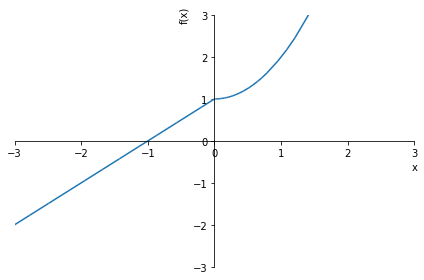

In [22]:
sym.plot(f, xlim=[-3, 3], ylim=[-3, 3]);

$$
f(0) = 3
$$

$$
\lim_{x \to 0} f(x) = 1
$$

In [23]:
f.subs(x, 0), f.subs(x, 0.0001), f.subs(x, -0.0001)

(3, 1.00000001000000, 0.999900000000000)

In [24]:
f.limit(x, 0)

1

We can see in the above example, that $f(a)$ need not be the same as $\lim_{x \to a} f(x)$. In fact, the function doesn't even need to be defined at $a$ for there to be a limit as $x \to a$.

### Example

$$
f(x) = \frac{\sin{x}}{x}
$$

$f(0)$ is undefined, but $\lim_{x \to 0} f(x) = 1$

In [25]:
f = sym.sin(x) / x
f

sin(x)/x

In [26]:
f.subs(x, 0), f.limit(x, 0)

(nan, 1)

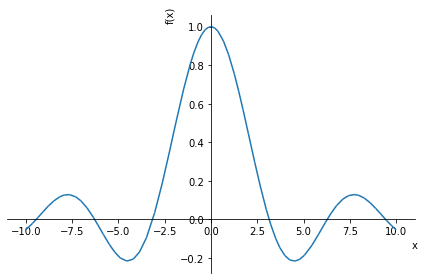

In [27]:
sym.plot(f);

### Finding limits using tables

$$
f(t) = \frac{\sqrt{t^{2} + 9} - 3}{t^{2}}
$$

What is $\lim_{t \to 0} f(t)$?

In [28]:
t = sym.symbols('t')

f = (sym.sqrt(t**2 + 9) - 3) / t**2
f

(sqrt(t**2 + 9) - 3)/t**2

In [29]:
x1 = [(1/n) for n in range(1, 100_000, 1000)]
y1 = [f.subs(t, a) for a in x1]

In [30]:
x2 = [(-1/n) for n in range(1, 100_000, 1000)]
y2 = [f.subs(t, a) for a in x2]

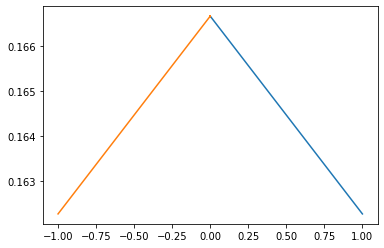

In [31]:
plt.plot(x1, y1)
plt.plot(x2, y2)

plt.show()

In [32]:
f

(sqrt(t**2 + 9) - 3)/t**2

In [33]:
f.subs(t, x1[-1]), f.subs(t, x2[-1]), f.limit(t, 0), f.limit(t, 0).evalf()

(0.166665646908500, 0.166665646908500, 1/6, 0.166666666666667)

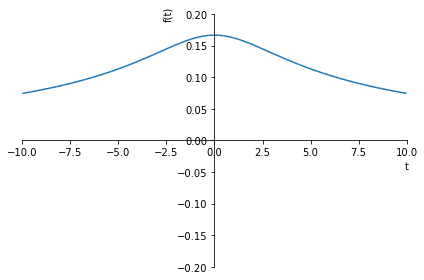

In [34]:
sym.plot(f, xlim=[-10, 10], ylim=[-.2, .2]);

### Example

$
f(x) = \sin{\frac{\pi}{x}}
$

$\lim_{x \to 0} f(x)$ does not exist. 

In [35]:
x = sym.symbols('x')

f = sym.sin(sym.pi/x)
f

sin(pi/x)

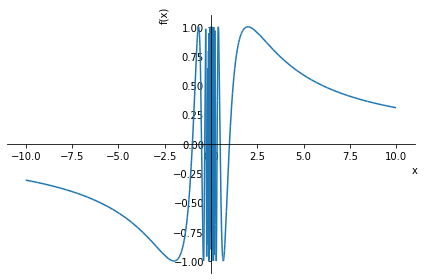

In [36]:
sym.plot(f);

In [37]:
f.subs(x, 0), f.limit(x, 0)

(nan, AccumBounds(-1, 1))

In [38]:
f.limit(x, 0, '-'), f.limit(x, 0, '+')

(AccumBounds(-1, 1), AccumBounds(-1, 1))

### Example: A constant function

$f(x) = 5$

$
\lim_{x \to 0} f(x) = 5
$

### Example

$
\begin{align}
\lim_{x \to 4} \left(x^{2} - 4\right) 
&= 4^2 - 4 \\
&= 16 - 4 \\
&= 12
\end{align}
$

In [39]:
x = sym.symbols('x')

f = x**2 - 4
f

x**2 - 4

In [40]:
f.limit(x, 4)

12

## 3.1.3 Reading: Limits and Rates of Change

### Limits

#### Intuitive definition of the limit

Suppose a function $f(x)$ is defined on some open interval containing the point $a$. The **limit** of $f$ as $x$ approaches $a$ is about the behaviour of the function values $f(x)$ as $x$ gets closer to $a$. 

There are two possible directions to approach $a$ alnong the x-axis, so there are two different ***one-sided limits***. If on both sides, the function values $f(x)$ approach the same number $L$, then we write

$$
\lim_{x \to a} f(x) = L
$$

which is read, "the limit of $f(x)$, as $x$ approaches $a$, equals $L$." This means that as $x$ gets closer to $a$ from either direction, the vlues of $f(x)$ get closer and closer to $L$. 

Note that the limit depends only on the behaviour *close* to $a$, not at $a$. $f(a)$ need not be defined for the $\lim_{a \to a} f(x)$ to exist, andm the limit need not equal $f(a)$. 

#### Limits and infinity

If a function's values become very large positive numbers as $x$ gets close to $a$, then we say, $\lim_{x \to a} = \infty$. 

Similary, if a function's values become very large negative numbers as $x$ gets close to $a$, then we say $\lim_{x \to a} f(x) = -\infty$. 

For example, $\lim_{x \to 0} \ln{x} = -\infty$

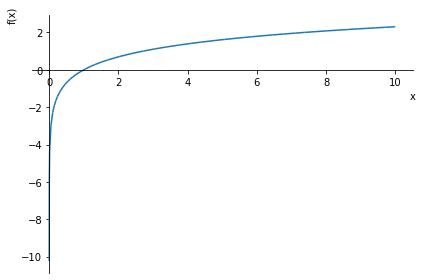

In [41]:
sym.plot(sym.ln(x));

Similarly, we can examine the limits of a function $f(x)$ at $\infty$ or $-\infty$, that is, as $x$ becomes a very large positive number or a very large negative number. 

For example, $\lim_{x \to -\infty} e^{x} = 0$. 

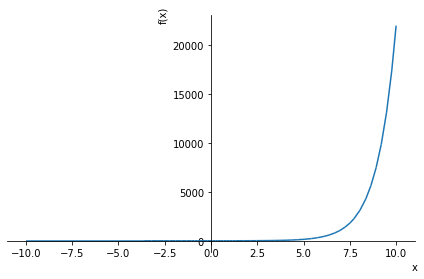

In [42]:
sym.plot(sym.exp(x));

Remember that $\infty$ and $-\infty$ are **not numbers**. They are just a way for us to discuss a function's behaviour. 

#### Rates of Change

The **average rate of change** of the function $f(x)$ on the interval $x = a$ to $x = b$ is:

$$
\frac{\Delta{f}}{\Delta{x}} = \frac{f(b) - f(a)}{b - a}
$$

The **instantaneous rate of change** of the function $f(x)$ at $x = c$ is the limit of the average rates of change of $f$ over shorter and shorter intervals containing $c$. 

The instantaneous rate of change of $f$ at $x = c$ is also called the **derivative** which is denoted by $f'(c)$.

#### Limit definition of the derivative

$$
f'(c) = \lim_{h \to 0} \frac{f(c + h) - f(c)}{h}
$$

$[c, c + h]$ is an interval containing $c$. 

$$
\frac{f(c + h) - f(c)}{(c + h) - c} =
\frac{f(c + h) - f(c)}{h}
$$

As $h$ goes to $0$, the interval gets shorter and shorter. 

#### Visualizing rates of change

The average rate of change from $x = a$ to $x = b$ is the slope of the line between the two points, $(a, f(a))$ and $(b, f(b))$. Such a line, intersecting the graph of a function at two points, is called a **secant line**. 

Consider the point $P(c, f(c))$ on the graph of $f$. For some positive value of $h$, let $Q(c + h, f(c + h))$ be another point on the graph. Then draw the secant line between $P$ and $Q$. 

As $h$ gets smaller and smaller, the point $Q$ gets closer and closer to the point $P$ and the secant line between $P$ and $Q$ gets closer and closer to the **tangent line to the graph of** $f$ **at** $P$. This is the line that touches the graph of $f$ at the point $P$, and has the same slope as the graph of $f$ at that point. 

<img src='https://drive.google.com/uc?export=view&id=113UoUGufJ7vFkyaYA7y46HcggT-hl607'> 

#### Summary

The **average rate of change** over an interval is equal to the slope of the secant line between the two points.

The **instantaneous rate of change** at a value is equal to the slope of the tangent line at a point. 

## 3.1.4 Theory: Limits Involving Infinity

### Example

$f(x) = \frac{1}{x^{2}}$

In [43]:
x = sym.symbols('x')
f = 1 / x**2
f

x**(-2)

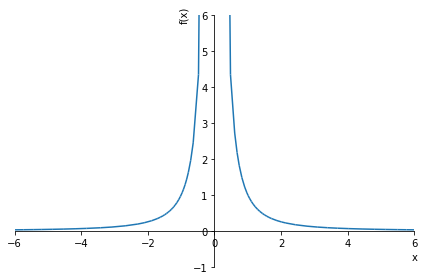

In [44]:
sym.plot(f, xlim=[-6, 6], ylim=[-1, 6]);

In [45]:
# dir='+' is the default
(f.limit(x, sym.oo),
 f.limit(x, -sym.oo))

(0, 0)

$
\lim_{x \to \infty} \frac{1}{x^{2}} = 0
$

$
\lim_{x \to -\infty} \frac{1}{x^{2}} = 0
$

In [46]:
(f.limit(x, 0, dir='-'),
 f.limit(x, 0, dir='+'),
 f.limit(x, 0, dir='-'),
 f.limit(x, 0, dir='+'))

(oo, oo, oo, oo)

$
\lim_{x \to 0+} \frac{1}{x^{2}} = \infty
$

$
\lim_{x \to 0-} \frac{1}{x^{2}} = \infty
$

The limit from the right is equal to the limit from the left.

$\therefore$

$
\lim_{x \to 0} \frac{1}{x^{2}} = \infty
$

**NOTE:** When we say the limit is "equal to" infinity, we are really saying that the limit does not exist. It is a special case of **DNE**, and it is more informative. 

### Vertical Asymptotes

#### Definition

The line $x = a$ is a **vertical asymptote** of $y = f(x)$ if at least one of the following is true.

1. $\lim_{x \to a} f(x) = \pm\infty$
2. $\lim_{x \to a+} f(x) = \pm\infty$
3. $\lim_{x \to a-} f(x) = \pm\infty$

#### Examples

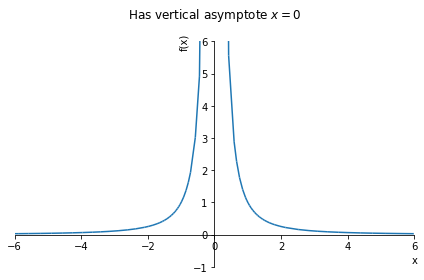

In [47]:
x = sym.symbols('x')
f = 1 / x**2

sym.plot(f, 
         xlim=[-6, 6], 
         ylim=[-1, 6],
         title='Has vertical asymptote $x = 0$\n');

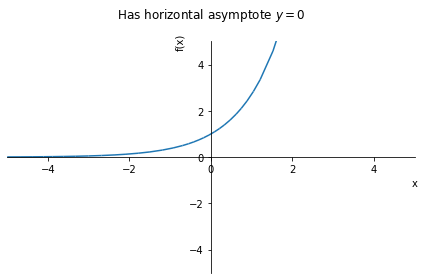

In [48]:
x = sym.symbols('x')
f = sym.exp(x)

sym.plot(f, 
         xlim=[-5, 5], 
         ylim=[-5, 5],
         title='Has horizontal asymptote $y = 0$\n');

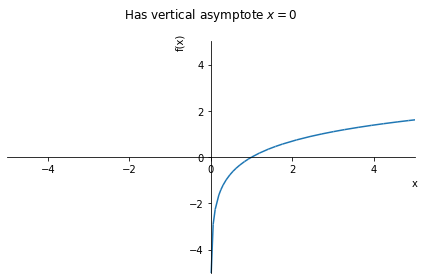

In [49]:
# this is the inverse of the the previous example
x = sym.symbols('x')
f = sym.ln(x)

sym.plot(f, 
         xlim=[-5, 5],
         ylim=[-5, 5],
         title='Has vertical asymptote $x = 0$\n');

In [50]:
# because of the domain restriction
#  the 2-sided limit does not exist
# but we have a 1-sided limit from the right
f.limit(x, 0, '+')

-oo

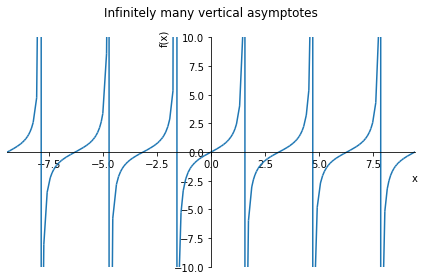

In [51]:
x = sym.symbols('x')
f = sym.tan(x)

sym.plot(f,
         xlim=[-3*sym.pi, 3*sym.pi], 
         ylim=[-10, 10],
         title='Infinitely many vertical asymptotes\n');

In [52]:
(sym.limit(f, x, sym.pi/2, '-'),
 sym.limit(f, x, sym.pi/2, '+'))

(oo, -oo)

$
\lim_{x \to \frac{\pi}{2}^{-}} \tan{x} = \infty
$

$
\lim_{x \to \frac{\pi}{2}^{+}} \tan{x} = -\infty
$

The 2-sided limit does not exist.

In [53]:
x = sym.symbols('x')
f = sym.ln(sym.ln(x))
f

log(log(x))

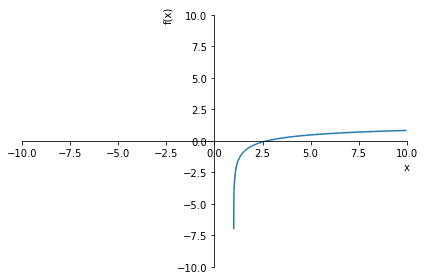

In [54]:
sym.plot(f, 
         xlim=[-10, 10], 
         ylim=[-10, 10]);

In [55]:
f.limit(x, 1, '+')

-oo

$
\lim_{x \to 1^{+}} \ln{\left(\ln{x}\right)} = -\infty
$

Recall that $\ln{1} = 0$, which gives us another way to look at this problem:

$
\lim_{x \to 0^{+}} \ln{x} 
$

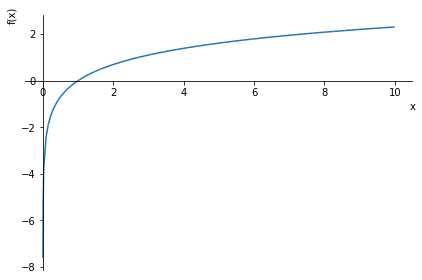

In [56]:
sym.plot(sym.ln(x));

In [57]:
sym.limit(sym.ln(x), x, 0, '+')

-oo

### Limits at infinity: $x \to \infty$

Can a function "touch" it's horizontal asymptote?

Yes, it may not touch the asymptote as $x \to \infty$ but it can touch it somewhere else.

Also, an oscillating function can touch it's aymptote an infinite number of times as $x \to \infty$. 

## 3.1.5 Theory: One-Sided Limits

### Example

$
f(x) = \sqrt{x}
$

$
\lim_{x \to 0^{+}} = 0
$

In [58]:
x = sym.symbols('x')

f = sym.sqrt(x)
f

sqrt(x)

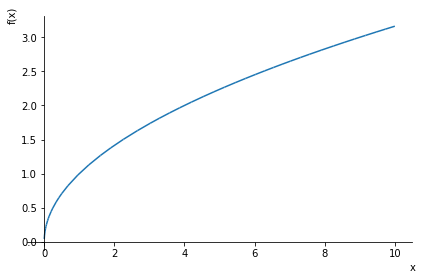

In [59]:
sym.plot(f);

In [60]:
f.limit(x, 0, '+')

0

### Requirement for two-sided limits

For $\lim_{x \to a} f(x)$ to exist, it must be the same value, $L$, if you approach from the left or the right.

$$
\lim_{x \to a} f(x) = L \iff \lim_{x \to a^{+}} f(x) = \lim_{x \to a^{-}} f(x) = L
$$

#### Example

$
f(x) = \frac{\left|x\right|}{x}
$

In [61]:
x = sym.symbols('x')

f = sym.Abs(x) / x
f

Abs(x)/x

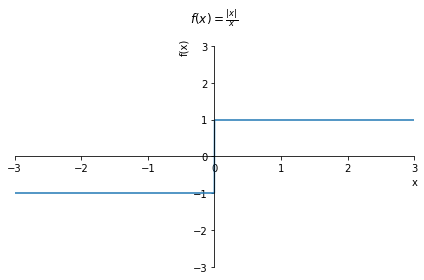

In [62]:
sym.plot(f, 
         xlim=[-3, 3], 
         ylim=[-3, 3],
         title = '$f(x) = ' + sym.latex(f) + '$\n');

In [63]:
f.limit(x, 0, '-'), f.limit(x, 0, '+')

(-1, 1)

$\lim_{x \to 0^{-}} \frac{\left|x\right|}{x} = -1$ and $\lim_{x \to 0^{+}} \frac{\left|x\right|}{x} = 1$

<br>

$\lim_{x \to 0} \frac{\left|x\right|}{x}$ does not exist.

In [64]:
the_domain = sym.calculus.util.continuous_domain(f, x, sym.S.Reals)
the_domain

Union(Interval.open(-oo, 0), Interval.open(0, oo))

## 3.1.6 Examples to Find Limits

$
\begin{align}
\lim_{x \to 5} {\frac{x^{2} - 6x + 5}{x - 5}}
&= \lim_{x \to 5} {\frac{(x - 5)(x - 1)}{x - 5}} \\
&= \lim_{x \to 5}{(x - 1)} \\
&= 5 - 1 \\
&= 4
\end{align}
$

In [65]:
x = sym.symbols('x')

f = (x**2 - 6*x + 5) / (x - 5)
f

(x**2 - 6*x + 5)/(x - 5)

In [66]:
f.limit(x, 5)

4

In [67]:
f.subs(x, 5), f.factor().subs(x, 5)

(nan, 4)

$
\begin{align}
\lim_{h \to 0}{\frac{(4 + h)^{2} - 16}{h}}
&= \lim_{h \to 0}{\frac{16 + 8h + h^{2} - 16}{h}} \\
&= \lim_{h \to 0}{\frac{h^{2} + 8h}{h}} \\
&= \lim_{h \to 0}{(h + 8)} \\
&= 0 + 8 \\
&= 8
\end{align}
$

In [68]:
h = sym.symbols('h')

f = ((4 + h)**2 - 16) / h
f

((h + 4)**2 - 16)/h

In [69]:
f.limit(h, 0)

8

$
\begin{align}
\lim_{x \to 0}{\frac{\frac{1}{4} + \frac{1}{x}}{4 + x}}
&= \lim_{x \to 0}{{\frac{\frac{x}{4x} + \frac{4}{4x}}{4 + x}}} \\
&= \lim_{x \to 0}{\frac{{\frac{x + 4}{4x}}}{x + 4}} \\
&= \lim_{x \to 0}{\frac{x + 4}{4x}\cdot\frac{1}{x + 4}} \\
&= \lim_{x \to 0}{\frac{1}{4x}} \\
&= \frac{1}{4}\cdot\lim_{x \to 0}{\frac{1}{x}} \\
&= DNE
\end{align} \\
$

The reason this limit does not exist is because the limit from the right is not equal to the limit from the left.

In [70]:
x = sym.symbols('x')

f = 1/x
f

1/x

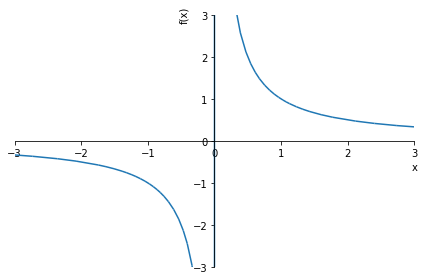

In [71]:
sym.plot(1/x, xlim=[-3, 3], ylim=[-3, 3]);

In [72]:
f.limit(x, 0, '+'), f.limit(x, 0, '-')

(oo, -oo)

In [73]:
f.limit(x, 0, '+-')

zoo

$
\begin{align}
\lim_{x \to 0}{\frac{4 - \sqrt{x}}{16x - x^{2}}} 
&= \lim_{x \to 0}{\frac{4 - \sqrt{x}}{x \cdot(16 - x)}} \\
&= \lim_{x \to 0}{\frac{4 - \sqrt{x}}{x \cdot(4 - \sqrt{x})(4 + \sqrt{x})}} \\
&= \lim_{x \to 0}{\frac{1}{x \cdot (4 + \sqrt{x})}} \\
&= \lim_{x \to 0}{\frac{1}{x}} \cdot \lim_{x \to 0}{\frac{1}{4 + \sqrt{x}}} \\
&= \frac{1}{4} \cdot \lim_{x \to 0}{\frac{1}{x}} \\
&= DNE
\end{align}
$

In [74]:
x = sym.symbols('x')

f = (4 - sym.sqrt(x)) / (16 * x - x**2)
f

(4 - sqrt(x))/(-x**2 + 16*x)

In [75]:
f.limit(x, 0, '+'), f.limit(x, 0, '-')

(oo, -oo)

$
\begin{align}
\lim_{t \to 0}{\frac{\sqrt{t^{2} + 9} - 3}{t^{2}}} 
&= \lim_{t \to 0}{\frac{\sqrt{t^{2} + 9} - 3}{t^{2}} \cdot \frac{\sqrt{t^2 + 9} + 3}{\sqrt{t^2 + 9} + 3}} \\
&= \lim_{t \to 0}{\frac{t^{2} + 9 - 9}{t^2(\sqrt{t^{2} + 9} + 3)}} \\
&= \lim_{t \to 0}{\frac{t^{2}}{t^2(\sqrt{t^{2} + 9} + 3)}} \\
&= \lim_{t \to 0}{\frac{1}{\sqrt{t^{2} + 9} + 3}} \\
&= \frac{1}{\sqrt{9} + 3} \\
&= \frac{1}{6}
\end{align}
$

In [76]:
t = sym.symbols('t')

f = (sym.sqrt(t**2 + 9) - 3) / t**2
f

(sqrt(t**2 + 9) - 3)/t**2

In [77]:
f.limit(t, 0, '+-')

1/6

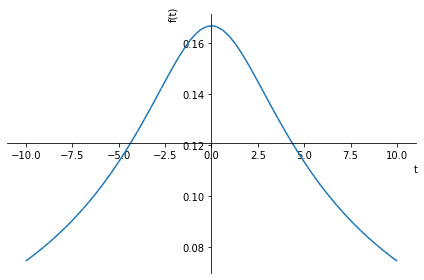

In [78]:
sym.plot(f);

## 3.1.7 Reading: Limits and Rates of Change in SymPy

### Estimating a limit

Estimate the limit of 

$
\lim_{x \to 2} {\frac{x^{2} - x - 2}{x - 2}}
$

In [79]:
x = sym.symbols('x')

f = (x**2 - x - 2) / (x - 2)
f

(x**2 - x - 2)/(x - 2)

In [80]:
x_from_left = [1.9, 1.99, 1.999]
x_from_right = [2.1, 2.01, 2.001]

In [81]:
f_from_left = [f.subs(x, n) for n in x_from_left]
f_from_left

[2.90000000000000, 2.98999999999998, 2.99899999999986]

In [82]:
f_from_right = [f.subs(x, n) for n in x_from_right]
f_from_right

[3.10000000000000, 3.00999999999998, 3.00100000000014]

It looks like the closer $x$ gets to 2, from both sides, the closer $f$ gets to $3$. 

$\therefore$ $3$ is my estimate for the limit.

### Computing a limit exactly

In [83]:
sym.limit(f, x, 2, '+'), sym.limit(f, x, 2, '-'), sym.limit(f, x, 2, '+-')

(3, 3, 3)

In [84]:
f.limit(x, 2, '+'), f.limit(x, 2, '-'), f.limit(x, 2, '+-')

(3, 3, 3)

### Limits at infinity

$
\lim_{x \to \infty}{e^{x}}
$

In [85]:
sym.limit(sym.exp(x), x, sym.oo)

oo

### Computing an instantaneous rate of change

Compute the instantaneous rate of change of $f(x) = e^{x^{2}}$ at $x = 1$. 

The instantaneous rate of change is given by

$$
\lim_{h \to 0}{\frac{f(1 + h) - f(1)}{h}}
$$

In [86]:
x, h = sym.symbols('x h')

f_x = sym.exp(x**2)
f_x

exp(x**2)

In [87]:
f_1h = f_x.subs(x, 1 + h)
f_1h

exp((h + 1)**2)

In [88]:
f_1 = f_x.subs(x, 1)
f_1

E

In [89]:
f = (f_1h - f_1) / h
f

(exp((h + 1)**2) - E)/h

In [90]:
f.limit(h, 0, '+-')

2*E

## 3.1.8 Python: Finding Limits

### Example

In [91]:
x = sym.symbols('x')

f = (sym.sqrt(1 + x) - sym.sqrt(1 - x)) / x 
f

(-sqrt(1 - x) + sqrt(x + 1))/x

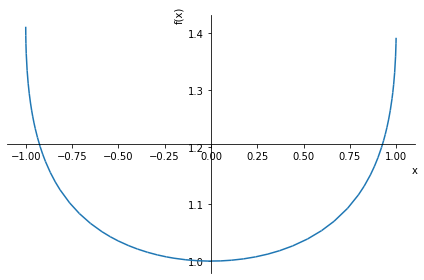

In [92]:
sym.plot(f, (x, -2, 2));

In [93]:
xval = [-.1, -.01, -.001, -.0001, 0.0001, .001, .01, .1]
xval

[-0.1, -0.01, -0.001, -0.0001, 0.0001, 0.001, 0.01, 0.1]

In [94]:
[round(f.subs(x, n), 4) for n in xval]

[1.0013,
 1.00000000000000,
 1.00000000000000,
 1.00000000000000,
 1.00000000000000,
 1.00000000000000,
 1.00000000000000,
 1.0013]

In [95]:
xval = np.array(xval)
xval

array([-0.1   , -0.01  , -0.001 , -0.0001,  0.0001,  0.001 ,  0.01  ,
        0.1   ])

In [96]:
np.round((np.vectorize(f.subs)(x, xval)).astype(float), 4)

array([1.0013, 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.0013])

In [97]:
f.limit(x, 0, dir='+-')

1

### Example: Limit at infinity

In [98]:
x = sym.symbols('x')

f = 1/x
f

1/x

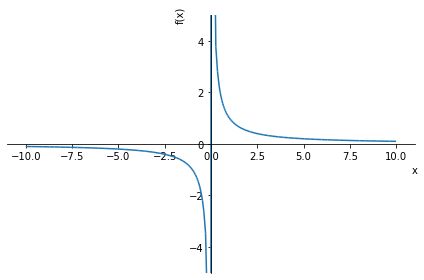

In [99]:
sym.plot(f, ylim=[-5, 5]);

In [100]:
f.limit(x, sym.oo, dir='+-')

0

In [101]:
f.limit(x, sym.oo, dir='+')

0

In [102]:
f.limit(x, sym.oo, dir='-')

0

In [103]:
f.limit(x, sym.S.Infinity)

0

## 3.1.9 Reading: Sample Problems - Limits and Rates of Change